<code> 
<strong><font size="+3">COMPARING ALL BLOB-LIKE EVENTS</font></strong>
</code>

In [1]:
# import packages
import xarray as xr; import numpy as np; import pandas as pd; import netCDF4 as nc; import scipy
# for plotting purposes
import matplotlib.pyplot as plt; import cmocean; import seaborn as sns
# using sklearn
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Area of interest (larger area in the North Pacific Ocean and by western US coast)

In [2]:
# latitude and longitude range for the North Pacific Ocean
lon_lim_less = 0.; lon_lim_great = 67.5 # x
lat_lim_less = 20.; lat_lim_great = 60. # y

# rescale
x_list = np.array([-180, lon_lim_less, lon_lim_great, 180]).reshape(-1,1)
x_scaler = preprocessing.MinMaxScaler(feature_range=(0, 287))
x_normalizedlist=x_scaler.fit_transform(x_list)

y_list = np.array([-90, lat_lim_less, lat_lim_great, 90]).reshape(-1,1)
y_scaler = preprocessing.MinMaxScaler(feature_range=(0, 191))
y_normalizedlist=y_scaler.fit_transform(y_list)

In [3]:
f_row = int(np.round(y_normalizedlist[1].item())); l_row = int(np.round(y_normalizedlist[2].item()))
f_col = int(np.round(x_normalizedlist[1].item())); l_col = int(np.round(x_normalizedlist[2].item()))
print(f_row, l_row)
print(f_col, l_col)

117 159
144 197


In [4]:
f_row_small = int(np.round(y_normalizedlist[1].item())); l_row_small = int(np.round(y_normalizedlist[2].item()))
f_col_small = int(x_normalizedlist[1].item()+((x_normalizedlist[2].item()-x_normalizedlist[1].item())/2))
l_col_small = int(np.round(x_normalizedlist[2].item()))
print(f_row_small, l_row_small)
print(f_col_small, l_col_small)

117 159
170 197


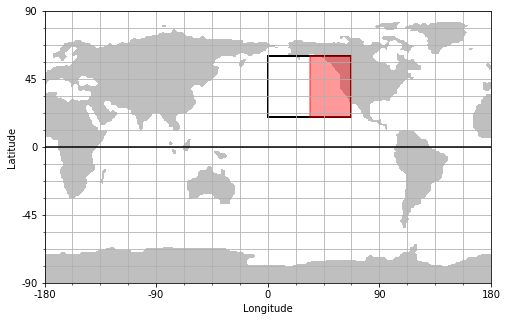

In [5]:
from matplotlib import patches # for the purpose of plotting

NPO_patch = patches.Rectangle((x_normalizedlist[1].item(), y_normalizedlist[1].item()), x_normalizedlist[2].item()-x_normalizedlist[1].item(), y_normalizedlist[2].item()-y_normalizedlist[1].item(), linewidth=2, edgecolor='k', facecolor='none',alpha=1.) 
NPO_smaller_patch_rotated = patches.Rectangle((x_normalizedlist[1].item()+((x_normalizedlist[2].item()-x_normalizedlist[1].item())/2), y_normalizedlist[1].item()), (x_normalizedlist[2].item()-x_normalizedlist[1].item())/2, y_normalizedlist[2].item()-y_normalizedlist[1].item(), linewidth=2, edgecolor='red', facecolor='red',alpha=.4) 

# landmask with relabeled axes
land_mask = np.load('SST_land.npy')
land_mask[land_mask > 0] = np.nan

fig, ax = plt.subplots(figsize=(8,5))
ax.contourf(land_mask, cmap='binary')
ax.minorticks_on()
ax.axhline(y=95.5, c='k', linestyle='-') # this is the equator line
ax.set_xticks([0, 71.75, 143.5, 215.25, 287]);ax.set_xticklabels([-180, -90, 0, 90, 180])
ax.set_yticks([0, 47.75, 95.5, 143.25, 191]);ax.set_yticklabels([-90, -45, 0, 45, 90])
ax.set_xlabel('Longitude'); ax.set_ylabel('Latitude')
ax.grid(which='both')
ax.add_patch(NPO_patch)
ax.add_patch(NPO_smaller_patch_rotated)

plt.show()

### Combining saved data files

In [6]:
# let's get our saved data files. We have a total of 1131 heatwaves.
file0 = '/glade/work/cassiacai/member0_9_bloblike_events_new_stuff.nc' # 118 heatwave events
file1 = '/glade/work/cassiacai/member10_19_bloblike_events_new_stuff.nc' # 99 heatwave events
file2 = '/glade/work/cassiacai/member20_29_bloblike_events_new_stuff.nc' # 121 heatwave events
file3 = '/glade/work/cassiacai/member30_39_bloblike_events_new_stuff.nc' # 116 heatwave events
file4 = '/glade/work/cassiacai/member40_49_bloblike_events_new_stuff.nc' # 116 heatwave events
file5 = '/glade/work/cassiacai/member50_59_bloblike_events_new_stuff.nc' # 123 heatwave events
file6 = '/glade/work/cassiacai/member60_69_bloblike_events_new_stuff.nc' # 112 heatwave events
file7 = '/glade/work/cassiacai/member70_79_bloblike_events_new_stuff_.nc' # 105 heatwave events
file8 = '/glade/work/cassiacai/member80_89_bloblike_events_new_stuff_.nc' # 99 heatwave events
file9 = '/glade/work/cassiacai/member90_99_bloblike_events_new_stuff_.nc' # 122 heatwave events

In [7]:
files = [file0, file1, file2, file3, file4, file5, file6, file7, file8, file9]

In [8]:
blob_files = []
for i in range(len(files)):
    blob_file_name = xr.open_dataset(files[i])
    blob_files.append(blob_file_name)

In [9]:
blob_files[0]

<xarray.Dataset>
Dimensions:    (heatwave_label: 118, time: 481, lat: 192, lon: 288)
Coordinates:
  * time       (time) object 1975-01-01 00:00:00 ... 2015-01-01 00:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    member_id  (heatwave_label) object ...
    quantile   float64 ...
    month      (time) int64 ...
Dimensions without coordinates: heatwave_label
Data variables:
    labels     (heatwave_label, time, lat, lon) float64 ...
    SSTA       (heatwave_label, time, lat, lon) float64 ...

### Analysis

In [12]:
%%time

# Arctic circle is approximately 66°N, which is why our lat is 0:160
file_number = 0
cumulative_SSTA_shapes = blob_files[file_number].SSTA[:,:,0:160,:].sum(dim='time')

CPU times: user 5.2 s, sys: 11.7 s, total: 16.9 s
Wall time: 18.4 s


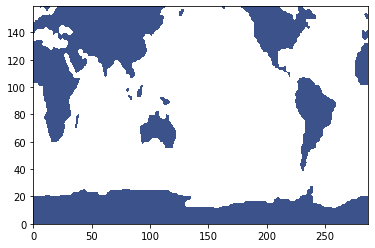

In [13]:
plt.contourf(land_mask[0:160,:])
plt.show()

In [ ]:
plt.contourf(cumulative_SSTA_shapes[0])

In [25]:
from sklearn.preprocessing import MinMaxScaler

# mhw_id = 0

# data = cumulative_SSTA_shapes[mhw_id]
# scaler = MinMaxScaler(feature_range=(-1, 1))
# scaler.fit(data)
# scaled_data = scaler.transform(data)

# plt.contourf(scaled_data, cmap='seismic'); plt.colorbar(); plt.contourf(land_mask, cmap='binary'); plt.show() # where are the hotspots? what is the line?
# plt.contourf(cumulative_SSTA_shapes[mhw_id]); plt.colorbar(); plt.contourf(land_mask, cmap='binary'); plt.show()

scaled_data_full = []
for i in range(len(cumulative_SSTA_shapes)):
    data = cumulative_SSTA_shapes[i]
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler.fit(data)
    scaled_data = scaler.transform(data)
    scaled_data_full.append(scaled_data)

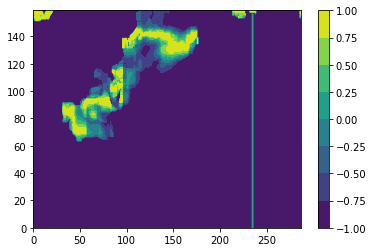

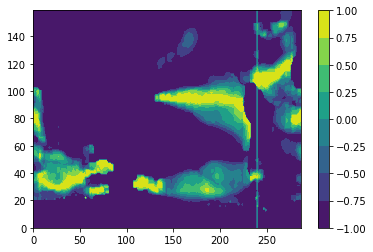

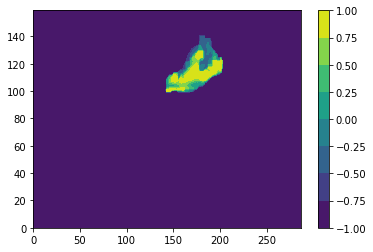

In [26]:
plt.contourf(scaled_data_full[0]); plt.colorbar(); plt.show()
plt.contourf(scaled_data_full[1]); plt.colorbar(); plt.show()
plt.contourf(scaled_data_full[2]); plt.colorbar(); plt.show()

In [27]:
# cumulative_duration_shapes = blob_files[file_number].labels[:,:,0:160,:].sum(dim='time')

(118, 160, 288)
0.2966101694915254


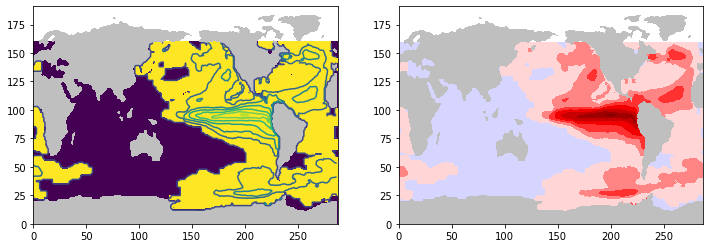

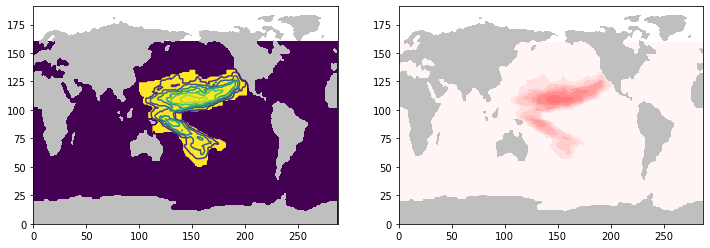

In [28]:
# ------ Group by cumulative area

copy_cumulative_SSTA_shapes = np.copy(cumulative_SSTA_shapes)
print(copy_cumulative_SSTA_shapes.shape)

copy_cumulative_SSTA_shapes[:][copy_cumulative_SSTA_shapes[:] != 0] = 1
# plt.contourf(copy_cumulative_SSTA_shapes[0])
# plt.show()

cumulative_area = []
for i in range(len(copy_cumulative_SSTA_shapes)):
    cumulative_area.append(copy_cumulative_SSTA_shapes[i].sum())

cumulative_area_ind = np.flip(np.argsort(cumulative_area))
sorted_cumulative_area = np.flip(np.sort(cumulative_area))

# plt.hist(sorted_cumulative_area)
# plt.xlabel('area'); plt.ylabel('frequency')
# plt.show()

df_area = pd.DataFrame(list(zip(cumulative_area_ind, sorted_cumulative_area)), columns =['ind', 'cumul_area'])
area_above_mean = df_area[df_area["cumul_area"] > df_area.cumul_area.mean()]
# print(list(area_above_mean.ind))
print(len(area_above_mean)/len(df_area))

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))
ax1.pcolor(copy_cumulative_SSTA_shapes[list(area_above_mean.ind)[0]]); ax1.contourf(land_mask, cmap='binary')
ax2.contourf(cumulative_SSTA_shapes[list(area_above_mean.ind)[0]],cmap='seismic',vmin=-50, vmax=50); ax2.contourf(land_mask, cmap='binary')
ax1.contour(cumulative_SSTA_shapes[list(area_above_mean.ind)[0]])
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))
ax1.pcolor(copy_cumulative_SSTA_shapes[list(area_above_mean.ind)[-1]]); ax1.contourf(land_mask, cmap='binary')
ax2.contourf(cumulative_SSTA_shapes[list(area_above_mean.ind)[-1]],cmap='seismic',vmin=-50, vmax=50); ax2.contourf(land_mask, cmap='binary')
ax1.contour(cumulative_SSTA_shapes[list(area_above_mean.ind)[-1]])
plt.show()

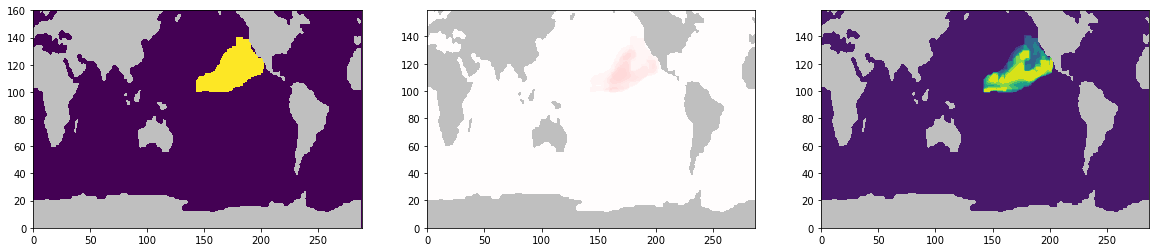

In [45]:
mhw_number = 2
# copy_cumulative_SSTA_shapes, cumulative_SSTA_shapes, scaled_data_full

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20,4))
ax1.pcolor(copy_cumulative_SSTA_shapes[mhw_number]); ax1.contourf(land_mask[0:160,:], cmap='binary')
ax2.contourf(cumulative_SSTA_shapes[mhw_number],cmap='seismic',vmin=-50, vmax=50); ax2.contourf(land_mask[0:160,:], cmap='binary')
ax3.contourf(scaled_data_full[mhw_number]); ax3.contourf(land_mask[0:160,:], cmap='binary')
plt.show()

In [46]:
# how many have an ENSO signal?
cropped_to_enso_signal_region = cumulative_SSTA_shapes.sel(lat=slice(-10,10), lon=slice(120,290))
# cropped_to_enso_signal_region[0,:,:].values

cropped_to_enso_signal_region[:,:,:].values[cropped_to_enso_signal_region[:,:,:].values != 0] = 1
enso_area = []
for i in range(len(cropped_to_enso_signal_region)):
    enso_area.append(cropped_to_enso_signal_region[i,:,:].sum().item())

In [47]:
# are the heatwaves with an ENSO signal our long heatwaves?

length_of_heatwave = []
first_month = []
last_month = []
for i in range(blob_files[file_number].SSTA[:,:,0:160,:].shape[0]):
    shortened= blob_files[file_number].SSTA[i,:,0:160,:].mean(axis=(1,2)).dropna(dim="time", how="any")
    length_of_heatwave.append(shortened.shape[0])
    first_month.append(shortened[0].time.month.values)
    last_month.append(shortened[-1].time.month.values)

In [48]:
first_month = np.array(first_month).flatten()

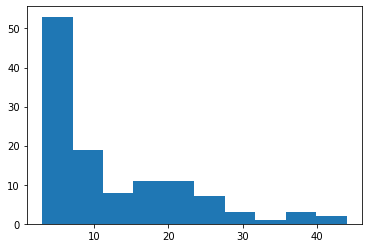

3


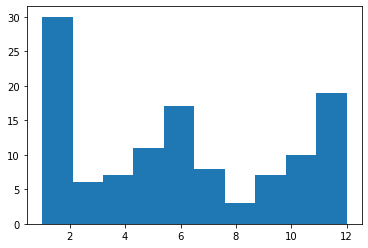

In [49]:
plt.hist(length_of_heatwave)
plt.show()
print(np.nanmin(length_of_heatwave))

plt.hist(first_month)
plt.show()

In [50]:
df_full = pd.DataFrame(list(zip(cumulative_area, enso_area, length_of_heatwave, first_month, last_month)), 
                       columns =['cumul_area', 'enso_area', 'length_of_heatwave', 'first_month', 'last_month'])

In [51]:
df_full['enso_cumularea'] = (df_full.enso_area / df_full.cumul_area)*100

In [52]:
df_full.head()

,cumul_area,enso_area,length_of_heatwave,first_month,last_month,enso_cumularea
0,5589.0,324.0,17,1,5,5.797101
1,15028.0,1836.0,18,7,12,12.217195
2,1317.0,242.0,3,3,5,18.375095
3,1392.0,0.0,7,12,6,0.000000
4,1447.0,0.0,4,6,9,0.000000


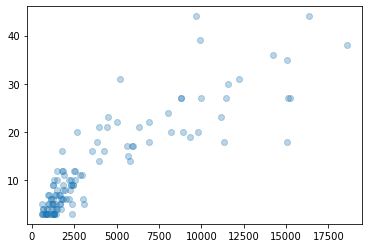

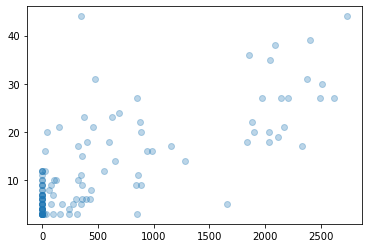

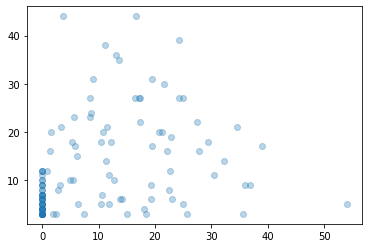

In [53]:
plt.scatter(df_full.cumul_area, df_full.length_of_heatwave,alpha=0.3)
plt.show()
plt.scatter(df_full.enso_area, df_full.length_of_heatwave,alpha=0.3)
plt.show()
plt.scatter(df_full.enso_cumularea, df_full.length_of_heatwave,alpha=0.3)
plt.show()

In [54]:
# where do the large heatwaves begin? 
sortedbycumularea_df = df_full.sort_values(by=['cumul_area'])
indices = np.flip(list(df_full.sort_values(by=['cumul_area']).index))

for i in indices[0:30]:
    new = blob_files[file_number].SSTA[i,:,0:160,:].mean(axis=(1,2)).values
    mask = np.isnan(new)
    leading_nans = mask.argmin()
    # print(sortedbycumularea_df.iloc[i].length_of_heatwave)
    # plt.contourf(blob_files[file_number].SSTA[i,leading_nans,0:160,:])
    # plt.show()
    
# where do the long heatwaves begin?

In [55]:
new = blob_files[file_number].SSTA[i,:,0:160,:].mean(axis=(1,2)).values
leading_nans = mask.argmin()
print(leading_nans)

0


In [56]:
## Picking out characteristics

# related to duration
length_of_heatwave = []
first_month = []
last_month = []

# related to intensity
mean_SSTa_timeseries = []
max_SSTa_timeseries = []

for i in range(blob_files[file_number].SSTA[:,:,0:160,:].shape[0]):
    shortened_mean= blob_files[file_number].SSTA[i,:,0:160,:].mean(axis=(1,2)).dropna(dim="time", how="any")
    shortened_max= blob_files[file_number].SSTA[i,:,0:160,:].max(axis=(1,2)).dropna(dim="time", how="any")
    
    mean_SSTa_timeseries.append(shortened_mean.values)
    max_SSTa_timeseries.append(shortened_max.values)
    
    length_of_heatwave.append(shortened_mean.shape[0])
    first_month.append(shortened_mean[0].time.month.values)
    last_month.append(shortened_mean[-1].time.month.values)

In [57]:
sortedbycumularea_df.tail()

,cumul_area,enso_area,length_of_heatwave,first_month,last_month,enso_cumularea
117,15039.0,2042.0,35,3,1,13.578030
50,15118.0,2620.0,27,1,3,17.330335
80,15222.0,2495.0,27,8,10,16.390750
22,16375.0,2729.0,44,9,4,16.665649
113,18566.0,2084.0,38,10,11,11.224820


In [83]:
# feeding first, max_extent, and last image
mhw_ind = 117

firstind = np.argwhere(np.isfinite(blob_files[file_number].SSTA[mhw_ind,:,0:160,:].mean(axis=(1,2)).values)).flatten()[0]
lastind = np.argwhere(np.isfinite(blob_files[file_number].SSTA[mhw_ind,:,0:160,:].mean(axis=(1,2)).values)).flatten()[-1]
print(firstind)
print(lastind)
first_image = blob_files[file_number].SSTA[mhw_ind,firstind:lastind,0:160,:][0]
last_image = blob_files[file_number].SSTA[mhw_ind,firstind:lastind,0:160,:][-1]
tot_len = lastind - firstind

# first_image.plot(); plt.show()
# last_image.plot(); plt.show()
total_area_ls = []

for i in range(tot_len):
    # new = blob_files[file_number].SSTA[mhw_ind,firstind:lastind,0:160,:][i][blob_files[file_number].SSTA[mhw_ind,firstind:lastind,0:160,:][i] != 0] = 1
    # print(new)
    new = np.copy(blob_files[file_number].SSTA[mhw_ind,firstind:lastind,0:160,:][i].values)
    new[:][new[:] == np.nan] = 0
    new[:][new[:] != 0] = 1
    print(np.sum(new), '-----',i)
    total_area_ls.append(np.sum(new))
    # print(blob_files[file_number].SSTA[mhw_ind,firstind:lastind,0:160,:][i].values)
    # print(new[new != 0] == 1)
    # blob_files[file_number].SSTA[mhw_ind,firstind:lastind,0:160,:][i].plot(vmin=-10,vmax=10); plt.show() 
    # print(firstind + i)
# could I get groups if I only fed in the first_image
# first_image.plot(); plt.show()
# last_image.plot(); plt.show()

446
480
46077.0 ----- 0
46080.0 ----- 1
46080.0 ----- 2
46078.0 ----- 3
46057.0 ----- 4
46054.0 ----- 5
46068.0 ----- 6
46063.0 ----- 7
46061.0 ----- 8
46049.0 ----- 9
46031.0 ----- 10
46046.0 ----- 11
46049.0 ----- 12
46029.0 ----- 13
46047.0 ----- 14
46002.0 ----- 15
46043.0 ----- 16
46062.0 ----- 17
46021.0 ----- 18
46012.0 ----- 19
46008.0 ----- 20
46040.0 ----- 21
46080.0 ----- 22
46080.0 ----- 23
46080.0 ----- 24
46080.0 ----- 25
46062.0 ----- 26
46072.0 ----- 27
46072.0 ----- 28
46069.0 ----- 29
46077.0 ----- 30
46079.0 ----- 31
46080.0 ----- 32
46080.0 ----- 33


In [86]:
print(np.argmax(total_area_ls))
print(total_area_ls)

1
[46077.0, 46080.0, 46080.0, 46078.0, 46057.0, 46054.0, 46068.0, 46063.0, 46061.0, 46049.0, 46031.0, 46046.0, 46049.0, 46029.0, 46047.0, 46002.0, 46043.0, 46062.0, 46021.0, 46012.0, 46008.0, 46040.0, 46080.0, 46080.0, 46080.0, 46080.0, 46062.0, 46072.0, 46072.0, 46069.0, 46077.0, 46079.0, 46080.0, 46080.0]


In [ ]:
print('yes')
print('maybe')

In [86]:
blob_files[file_number].SSTA[0,:,0:160,:].mean(axis=(1,2)).values

firstind = np.argwhere(np.isfinite(blob_files[file_number].SSTA[0,:,0:160,:].mean(axis=(1,2)).values)).flatten()[0]
lastind = np.argwhere(np.isfinite(blob_files[file_number].SSTA[0,:,0:160,:].mean(axis=(1,2)).values)).flatten()[-1]

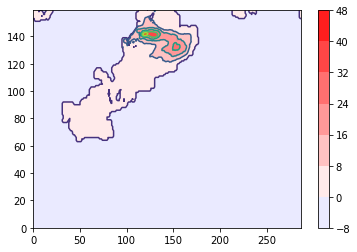

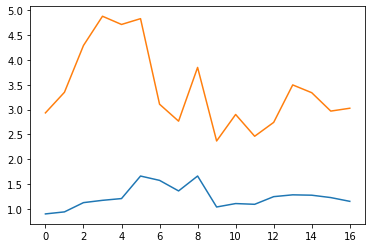

In [70]:
plt.contourf(cumulative_SSTA_shapes[0],vmin=-50, vmax= 50, cmap='bwr'); plt.colorbar()
plt.contour(cumulative_SSTA_shapes[0])
plt.show()

plt.plot(range(len(mean_SSTa_timeseries[0])), mean_SSTa_timeseries[0])
plt.plot(range(len(mean_SSTa_timeseries[0])), max_SSTa_timeseries[0])
plt.show()

In [57]:
# Arctic circle is approximately 66°N
file_number = 0
SSTA_blob_file0 = blob_files[file_number].SSTA[:,:,0:160,:]
label_blob_file0 = blob_files[file_number].labels[:,:,0:160,:]

cumulative_SST_shapes = []

for i in range((np.shape(np.asarray(blob_files[file_number].SSTA))[0])):
    x = blob_files[file_number].SSTA[i,:,0:160,:] # looping through each marine heatwave event
    mhw_as_one_im = x.sum(axis=(0))
    cumulative_SST_shapes.append(mhw_as_one_im)
    # no_nans_x = np.nan_to_num(mhw_as_one_im)
        # no_nans_x[no_nans_x != 0] = 1
        # no_nans_x_full.append(no_nans_x)

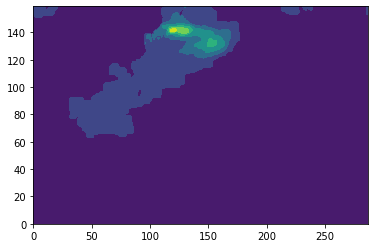

In [105]:
plt.contourf(cumulative_SST_shapes[0])
plt.show()

In [87]:
cumulative_SSTA_shapes[0].values[cumulative_SSTA_shapes[0].values != 0] = 1

In [76]:
c = blob_files[file_number].SSTA[0,:,:,:].where(blob_files[file_number].SSTA[0,:,:,:] != 0, other=1)

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

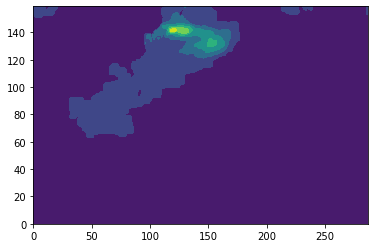

In [62]:
plt.contourf(cumulative_SSTA_shapes[0,:,:])
plt.show()

In [ ]:
# %%timeit
## Note that this requires a lot of GPU
# combined_file_0_to_5 = xr.concat(blob_files[0:5],"heatwave_label")
# combined_file_5_to_10 = xr.concat(blob_files[5:10],"heatwave_label")

In [ ]:
# combined_file0_to_5.to_netcdf('/glade/work/cassiacai/combined_file0_to_5.nc')
# combined_file5_to_10.to_netcdf('/glade/work/cassiacai/combined_file5_to_10.nc')

## Data Analysis

In [15]:
no_nans_x_full = []

for file_num in range(len(blob_files)):
    print(file_num)
    
    for i in range((np.shape(np.asarray(blob_files[file_num].SSTA))[0])):
        
        x = blob_files[file_num].SSTA[i,:,:,:] # looping through each marine heatwave event 
        
        # similar to MNIST dataset where we group images of numbers.
        mhw_as_one_im = x.sum(axis=(0)) 
        no_nans_x = np.nan_to_num(mhw_as_one_im)
        no_nans_x[no_nans_x != 0] = 1
        no_nans_x_full.append(no_nans_x)

# np.save('no_nans_x_full.npy', no_nans_x_full, allow_pickle=True)

0
1
2
3
4
5
6
7
8
9


In [20]:
no_nans_x_full = np.load('no_nans_x_full.npy', allow_pickle=True)
print(len(no_nans_x_full))

In [58]:
# try pixel similarity
import torch.nn.functional as F
import torch
print("Using torch", torch.__version__)

'''
1. Take the mean of the absolute value of differences (absolute value is the function 
  that replaces negative values with positive values). This is called the mean absolute 
  difference or L1 norm
2. Take the mean of the square of differences (which makes everything positive) and then 
  take the square root (which undoes the squaring). This is called the root mean squared 
  error (RMSE) or L2 norm.
'''
npcopyof_no_nans_x_full = np.copy(no_nans_x_full)

l1_loss_full = []; MSE_loss_full = []

for i in range(len(no_nans_x_full)):
    print(i)
    l1_loss_i = []; MSE_loss_i = []
    first = torch.tensor(no_nans_x_full[i])
    for j in range(len(npcopyof_no_nans_x_full)):
        second = torch.tensor(npcopyof_no_nans_x_full[j])
        l1_loss_i.append(F.l1_loss(first,second))
        MSE_loss_i.append(F.mse_loss(first,second).sqrt())
    l1_loss_full.append(l1_loss_i)
    MSE_loss_full.append(MSE_loss_i)

Using torch 1.12.1+cu102
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
2

In [63]:
len(MSE_loss_full)

1131

In [65]:
len(MSE_loss_full[0])

1131

In [59]:
# np.save('no_nans_x_l1_loss_full.npy', l1_loss_full, allow_pickle=True)
# np.save('no_nans_x_MSE_loss_full.npy', MSE_loss_full, allow_pickle=True)

In [ ]:
no_nans_x_l1_loss_full = np.load('no_nans_x_l1_loss_full.npy', allow_pickle=True)
no_nans_x_MSE_loss_full = np.load('no_nans_x_MSE_loss_full.npy', allow_pickle=True)

In [66]:
print('yes')

yes


In [67]:
first = torch.tensor(no_nans_x_full[0])
second = torch.tensor(no_nans_x_full[1])
l1loss = F.l1_loss(first,second)
mseloss = F.mse_loss(first,second).sqrt()

In [73]:
print(l1loss.item())

0.45679615162037035


In [76]:
from skimage.metrics import structural_similarity
import cv2
import numpy as np

# Compute SSIM between two images
score, diff = structural_similarity(first, second, full=True)
print("Similarity Score: {:.3f}%".format(score * 100))

# The diff image contains the actual image differences between the two images
# and is represented as a floating point data type so we must convert the array 
# to 8-bit unsigned integers in the range [0,255] before we can use it with OpenCV
diff = (diff * 255).astype("uint8")

# Threshold the difference image, followed by finding contours to
# obtain the regions that differ between the two images
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

# Highlight differences
mask = np.zeros(first.shape, dtype='uint8')
filled = second.copy()

for c in contours:
    area = cv2.contourArea(c)
    if area > 100:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(first, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(second, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(mask, [c], 0, (0,255,0), -1)
        cv2.drawContours(filled, [c], 0, (0,255,0), -1)

cv2.imshow('first', first)
cv2.imshow('second', second)
cv2.imshow('diff', diff)
cv2.imshow('mask', mask)
cv2.imshow('filled', filled)
cv2.waitKey()

AttributeError: 'torch.dtype' object has no attribute 'type'

In [ ]:
plt.contourf(first - second)

In [33]:
im3_t = torch.tensor(no_nans_x_full[0])
df = pd.DataFrame(im3_t)
print(df)

     0    1    2    3    4    5    6    7    8    9    ...  278  279  280  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
187  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
188  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
189  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
190  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
191  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   

     281  282  283  284  285  286  287  
0    0.0  0.0  0.0  0.0  0.0  0.0 

In [ ]:
cumulative_SSTA = [] # adding up SSTAs
area_filled_of_region_with_days = [] 
area_filled_of_region_wo_days = []
length_of_event = []

area_filled_of_region_with_days_small = [] # this is right by the coastline
area_filled_of_region_wo_days_small = []

for file_num in range(len(blob_files)):
    print(file_num)
    
    for i in range((np.shape(np.asarray(blob_files[file_num].SSTA))[0])):
        x = blob_files[file_num].SSTA[i,:,:,:]

        # cumulative SSTA (summing SSTAs across all days)
        cumulative_SSTA.append(x.sum(axis=(0)))

        # collecting events that fill up X percentage of our area of interest
        no_nans_x = np.nan_to_num(x)
        no_nans_x[no_nans_x != 0] = 1
        sum_of_one = no_nans_x.sum(axis=(0))
        array_of_interest = np.copy(sum_of_one[f_row:l_row,f_col:l_col])

        area_filled_of_region_with_days.append(100*np.nansum(array_of_interest) / (42*53)) # with days might not make much sense
        length_of_event.append(np.nanmax(array_of_interest))
        array_of_interest[array_of_interest != 0] = 1
        area_filled_of_region_wo_days.append(100*np.nansum(array_of_interest)/(42*53))    

        array_of_interest_small = np.copy(sum_of_one[f_row_small:l_row_small,f_col_small:l_col_small])
        area_filled_of_region_with_days_small.append(100*np.nansum(array_of_interest_small) / (42*53)) 
        array_of_interest_small[array_of_interest_small != 0] = 1
        area_filled_of_region_wo_days_small.append(100*np.nansum(array_of_interest_small)/(42*53)) 

In [ ]:
print(len(cumulative_SSTA))
print(len(area_filled_of_region_with_days))
print(len(area_filled_of_region_wo_days))
print(len(length_of_event))
print('')
print(len(area_filled_of_region_with_days_small))
print(len(area_filled_of_region_wo_days_small))

In [ ]:
print(np.nanmax(length_of_event))

In [ ]:
sns.histplot(data=length_of_event, binwidth=1, kde=True)

plt.title('MHW duration')
plt.show()

print('The longest event lasts', np.nanmax(length_of_event), 'months or', np.around(np.nanmax(length_of_event)/12, decimals=2), 'years.') 
print('The shortest collected event lasts', np.nanmin(length_of_event), 'months or', np.around(np.nanmin(length_of_event)/12, decimals=2), 'years.')

### Data processing

- Timeseries analysis --> 
- Compare shapes (don't use SSTA but make all SSTA values equal to some constant)

- Visualize as a widget (timeseries) *code is up on Github
 ----- save slices, stitch as a GIF --> visualize and see
- Patterns of evolution (look the same in space but different in time) --> acted differently maybe

- variance --> build --> sum, variance, moments --> can start describing the distribution --> skewness
- maybe make feature --> distances

- how you sample --> 2 cluster within 2 groups --> some popular thing --> hides the details of the other groups
- clustering on the other stuff
- Statistics of lots of stuff

- try hierarchical clustering --> level of connection between hard to differentiate clusters --> don't have 
- to decide the number of clusters until later --> link --> scikit-learn --> dendogram

Clustering is a processof grouping data with similar spatial attributes, temporal attributes, or both, from which many significant events and regular phenomena can be discovered. 

In [ ]:
%%time

cumulative_SSTA = [] # adding up SSTAs
area_filled_of_region_with_days = [] 
area_filled_of_region_wo_days = []
length_of_event = []

area_filled_of_region_with_days_small = [] # this is right by the coastline
area_filled_of_region_wo_days_small = []

for i in range((np.shape(np.asarray(combined_file.SSTA))[0])):
    x = combined_file.SSTA[i,:,:,:]

    # cumulative SSTA (summing SSTAs across all days)
    cumulative_SSTA.append(x.sum(axis=(0)))

    # collecting events that fill up X percentage of our area of interest
    no_nans_x = np.nan_to_num(x)
    no_nans_x[no_nans_x != 0] = 1
    sum_of_one = no_nans_x.sum(axis=(0))
    array_of_interest = np.copy(sum_of_one[f_row:l_row,f_col:l_col])
        
    area_filled_of_region_with_days.append(100*np.nansum(array_of_interest) / (42*53)) # with days might not make much sense
    length_of_event.append(np.nanmax(array_of_interest))
    array_of_interest[array_of_interest != 0] = 1
    area_filled_of_region_wo_days.append(100*np.nansum(array_of_interest)/(42*53))    
    
    array_of_interest_small = np.copy(sum_of_one[f_row_small:l_row_small,f_col_small:l_col_small])
    area_filled_of_region_with_days_small.append(100*np.nansum(array_of_interest_small) / (42*53)) 
    array_of_interest_small[array_of_interest_small != 0] = 1
    area_filled_of_region_wo_days_small.append(100*np.nansum(array_of_interest_small)/(42*53)) 

In [ ]:
print(len(cumulative_SSTA))
print(len(area_filled_of_region_with_days))
print(len(area_filled_of_region_wo_days))
print(len(length_of_event))
print('')
print(len(area_filled_of_region_with_days_small))
print(len(area_filled_of_region_wo_days_small))

In [ ]:
sns.histplot(data=length_of_event, binwidth=1, kde=True)
plt.ylim(0, 50)
plt.title('MHW duration')
plt.show()

print('The longest event lasts', np.nanmax(length_of_event), 'months or', np.around(np.nanmax(length_of_event)/12, decimals=2), 'years.') 
print('The shortest collected event lasts', np.nanmin(length_of_event), 'months or', np.around(np.nanmin(length_of_event)/12, decimals=2), 'years.')

In [ ]:
print(len(cumulative_SSTA))
print(len(area_filled_of_region_with_days))
print(len(area_filled_of_region_wo_days))
print(len(length_of_event))

In [ ]:
print(np.nanmax(area_filled_of_region_wo_days))
print(np.nanmin(area_filled_of_region_wo_days))

print(np.nanmax(area_filled_of_region_wo_days_small))
print(np.nanmin(area_filled_of_region_wo_days_small))

In [ ]:
sns.histplot(data=area_filled_of_region_wo_days, binwidth=5, kde=True)
plt.xlim(20, 100)
plt.show()

print(np.nanmin(area_filled_of_region_wo_days))
print(np.nanmax(area_filled_of_region_wo_days))

In [ ]:
area_filled_pd = pd.DataFrame(
    {'full_reg': area_filled_of_region_wo_days,
     'coast_reg': area_filled_of_region_wo_days_small,
     'event_len': length_of_event
    })

In [ ]:
area_filled_pd.head()

In [ ]:
sns.scatterplot(x=area_filled_pd['full_reg'],y=area_filled_pd['coast_reg'],alpha=1.0, s=40)
plt.xlim(20,100);plt.ylim(-10,50)
plt.axhline(y=0, c='k')
plt.xlabel('% area of full region filled')
plt.ylabel('% area of coast region filled')
plt.show()

In [ ]:
print(len(area_filled_pd))
rslt_df = area_filled_pd[area_filled_pd['coast_reg'] > 0].reset_index()
rslt_df = rslt_df.sort_values(by=['coast_reg']).reset_index()
print(rslt_df.head())
print('')
print(rslt_df.tail())
print('')
print(len(area_filled_pd) - len(rslt_df)) # number of MHWs without a footprint by the coast

In [ ]:
plt.scatter(x=area_filled_pd['full_reg'],y=area_filled_pd['coast_reg'],c=area_filled_pd['event_len'], cmap='Reds',edgecolors= "black", s = 60, alpha=0.8)
plt.colorbar()
plt.xlim(20,100);plt.ylim(-5,45)
plt.axhline(y=0, c='k')
plt.xlabel('% area of full region filled')
plt.ylabel('% area of coast region filled')
plt.show()

In [ ]:
area_filled_pd_with_days = pd.DataFrame(
    {'full_reg': area_filled_of_region_with_days,
     'coast_reg': area_filled_of_region_with_days_small,
     'event_len': length_of_event
    })

In [ ]:
area_filled_pd_with_days.head()

In [ ]:
sns.scatterplot(x=area_filled_pd_with_days['full_reg'],y=area_filled_pd_with_days['coast_reg'],alpha=0.7, s=60)
# plt.xlim(20,100);plt.ylim(-10,50)
plt.axhline(y=0, c='k')
plt.xlabel('% area of full region filled with days')
plt.ylabel('% area of coast region filled with days')
plt.show()

In [ ]:
print(len(area_filled_pd_with_days))
rslt_df_with_days = area_filled_pd_with_days[area_filled_pd_with_days['coast_reg'] > 0].reset_index()
rslt_df_with_days = rslt_df_with_days.sort_values(by=['coast_reg']).reset_index()
print(rslt_df_with_days.head())
print('')
print(rslt_df_with_days.tail())
print('')
print(len(area_filled_pd_with_days) - len(rslt_df_with_days)) # number of MHWs without a footprint by the coast

In [ ]:
plt.scatter(x=area_filled_pd_with_days['full_reg'],y=area_filled_pd_with_days['coast_reg'],c=area_filled_pd_with_days['event_len'], cmap='Reds',edgecolors= "black", s = 60, alpha=0.7)
plt.colorbar()
plt.axhline(y=0, c='k')
plt.xlabel('% area of full region filled with days')
plt.ylabel('% area of coast region filled with days')
plt.show()

In [ ]:
# Cumulative SSTAs

X = np.reshape(np.asarray(cumulative_SSTA), (1131, 192*288))
print(X.shape)

In [ ]:
def plot_grid(XX, N):  
    """Small helper function to plot"""
    fig, ax = plt.subplots(N, N, figsize=(16, 16))
    for i in range(N):
        for j in range(N):
            ax[i,j].imshow(XX[(N)*i+j,:].reshape((192, 288)), cmap="seismic")
            ax[i,j].axis("off")
plot_grid(X, 8)

In [ ]:
mean_data = np.mean(X,0)
centered_X = X - mean_data

pca = PCA(n_components = 100)
pca.fit(centered_X) #X_train_standard

components = pca.components_
print(components[:16,:].shape)

In [ ]:
#### Explained variance, explained variance ratio, singular values
# -------------------------------------------
# From documentation:

# explained_variance_ : array, shape (n_components,) The amount 
# of variance explained by each of the selected components.

# explained_variance_ratio_ : array, shape (n_components,) Percentage 
# of variance explained by each of the selected components.

# singular_values_ndarray of shape (n_components,)
# The singular values corresponding to each of the selected components. 
# The singular values are equal to the 2-norms of the n_components 
# variables in the lower-dimensional space.

# -------------------------------------------

nuclear_norm = np.linalg.norm(pca.singular_values_) # is the sum of singular singulars
sv_scaled = pca.singular_values_**2/(nuclear_norm**2) 
# sv_scaled = pca.explained_variance_ratio_
sv_total = np.cumsum(pca.singular_values_**2)/(nuclear_norm**2)

In [ ]:
# -- Plot the singular values
plt.rcParams["figure.figsize"] = (25,6)

plt.subplot(1, 4, 1)
plt.plot(sv_scaled, 'blue') # equivalent to pca.explained_variance_ratio_
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.xlabel('PCA component', fontsize=15)
plt.ylabel('explained variance ratio', fontsize=15)

plt.subplot(1, 4, 2)
plt.plot(sv_total, 'blue')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)

plt.xlabel('PCA component', fontsize=15)
plt.ylabel('cumulatiave explained variance ratio', fontsize=15)

plt.subplot(1, 4, 3)
plt.plot(sv_total[:30], 'blue')
plt.xticks(fontsize=15); plt.yticks(fontsize=15)

plt.xlabel('PCA component', fontsize=15)
plt.ylabel('cumulatiave explained variance ratio', fontsize=15)

plt.subplot(1, 4, 4)
plt.plot(np.log(sv_scaled),'blue') # equivalent to np.log(pca.singular_values_)
# plt.plot(np.log(pca.singular_values_))
plt.xticks(fontsize=15); plt.yticks(fontsize=15)
plt.xlabel('PCA component', fontsize=15)
plt.ylabel('log(explained variance ratio)', fontsize=15)

plt.show()

In [ ]:
pca_total = PCA(n_components=100)
pca_total.fit(X)
frobenius_norm = np.sqrt(sum(pca_total.singular_values_**2))

In [ ]:
def no_pca_modes(ratio):
    pca_test = PCA(n_components=1)
    pca_test.fit(X)
    np.sqrt(sum(pca_test.singular_values_**2))
    i = 1
    while np.sqrt(sum(pca_test.singular_values_**2)) < ratio*frobenius_norm:
        i += 1
        pca_test = PCA(n_components=i)
        pca_test.fit(X)
    return i

print('Number of PCA modes to keep to approximate X_train up to 60%: ', no_pca_modes(0.6))
print('Number of PCA modes to keep to approximate X_train up to 80%: ',no_pca_modes(0.8))
print('Number of PCA modes to keep to approximate X_train up to 90%: ',no_pca_modes(0.9))
print('Number of PCA modes to keep to approximate X_train up to 95%: ',no_pca_modes(0.95))

In [ ]:
plot_grid(components[:19,:], 4)

In [ ]:
reshape_comp = np.reshape(components, (100,192,288))
print(reshape_comp.shape)
reshape_comp[0,:,:].shape

fig, ax = plt.subplots(figsize=(8,5))
plt.contourf(reshape_comp[0,:,:])
plt.colorbar()
plt.contourf(land_mask, cmap='binary')
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
plt.contourf(reshape_comp[1,:,:])
plt.colorbar()
plt.contourf(land_mask, cmap='binary')
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
plt.contourf(reshape_comp[2,:,:])
plt.colorbar()
plt.contourf(land_mask, cmap='binary')
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
plt.contourf(reshape_comp[3,:,:])
plt.colorbar()
plt.contourf(land_mask, cmap='binary')
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
plt.contourf(reshape_comp[4,:,:])
plt.colorbar()
plt.contourf(land_mask, cmap='binary')
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
plt.contourf(reshape_comp[5,:,:])
plt.colorbar()
plt.contourf(land_mask, cmap='binary')
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
plt.contourf(reshape_comp[6,:,:])
plt.colorbar()
plt.contourf(land_mask, cmap='binary')
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
plt.contourf(reshape_comp[7,:,:])
plt.colorbar()
plt.contourf(land_mask, cmap='binary')
plt.show()

In [ ]:
PCs = pca.transform(X)
PCs.shape

In [ ]:
PCs[0,:]

In [ ]:
number_of_PCA_modes = 8

In [ ]:
# Let's just check what this looks like. Note to self: This is basically EOFs. 
print(PCs[0,:8]) 
print(PCs[1,:8])
print(PCs[2,:8])
print(PCs[3,:8])

In [ ]:
from sklearn import decomposition

grid = X
n_samples, n_features = grid.shape
estimator_3 = decomposition.PCA(n_components=3)
grid_recons_3 = estimator_3.inverse_transform(estimator_3.fit_transform(grid))

In [ ]:
indices = np.random.choice(n_samples, 5, replace=False)

In [ ]:
image_shape = (192, 288)

In [ ]:
n_components = 8

Show 5 randomly chosen grids and their PCA reconstructions with 8 dominant eigenvectors

In [ ]:
plt.figure(figsize=(10,5))
for i in range(len(indices)):
    plt.subplot(1,5,i+1), plt.imshow(np.reshape(grid[indices[i],:], image_shape), cmap="Greys"), plt.axis('on')
plt.show()

plt.figure(figsize=(10,5))
for i in range(len(indices)):
    plt.subplot(1,5,i+1), plt.imshow(np.reshape(grid_recons_3[indices[i],:], image_shape),cmap="Greys"), plt.axis('on')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="random",
                n_clusters=8, # elbow plot
                n_init=10,
                max_iter=300,
                random_state=42)

In [ ]:
kmeans.fit(PCs)

In [ ]:
# The lowest SSE value --> What does this mean? Algorithm is trying to minimize this.
kmeans.inertia_

In [ ]:
# Final locations of the centroid
kmeans.cluster_centers_

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

In [ ]:
kmeans.labels_

In [ ]:
ind_0 = []; ind_1 = []; ind_2 = []; ind_3 = []
ind_4 = []; ind_5 = []; ind_6 = []; ind_7 = []

for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i] == 0:
        ind_0.append(i)
    elif kmeans.labels_[i] == 1:
        ind_1.append(i)
    elif kmeans.labels_[i] == 2:
        ind_2.append(i)
    elif kmeans.labels_[i] == 3:
        ind_3.append(i)
    elif kmeans.labels_[i] == 4:
        ind_4.append(i)
    elif kmeans.labels_[i] == 5:
        ind_5.append(i)
    elif kmeans.labels_[i] == 6:
        ind_6.append(i)
    elif kmeans.labels_[i] == 7:
        ind_7.append(i)

In [ ]:
print(len(ind_0))
print(len(ind_1))
print(len(ind_2))
print(len(ind_3))
print(len(ind_4))
print(len(ind_5))
print(len(ind_6))
print(len(ind_7))

In [ ]:
plt.hist(kmeans.labels_)
plt.show()

In [ ]:
ind_2

In [ ]:
for i in range(len(ind_2)):
    combined_file.SSTA[i,:,:,:].sum(axis=0).plot(cmap='Reds')
    plt.show()

In [ ]:
combined_file.SSTA[1,:,:,:].sum(axis=0).plot(cmap='Reds')
plt.show()
combined_file.SSTA[9,:,:,:].sum(axis=0).plot(cmap='Reds')
plt.show()